<a href="https://colab.research.google.com/github/kusawokoshitemori/MachineLearningPractice/blob/main/MachineLearningPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


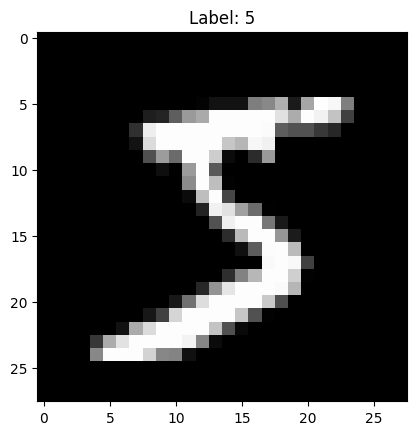

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNISTデータを取得
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 画像を表示
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [2]:
# 画像データを0〜1に正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Normalized data:", train_images[0])


Normalized data: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8778 - loss: 0.4221 - val_accuracy: 0.9607 - val_loss: 0.1321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9651 - loss: 0.1215 - val_accuracy: 0.9708 - val_loss: 0.0986
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9781 - loss: 0.0783 - val_accuracy: 0.9716 - val_loss: 0.0888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9833 - loss: 0.0560 - val_accuracy: 0.9755 - val_loss: 0.0821
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 0.9766 - val_loss: 0.0754


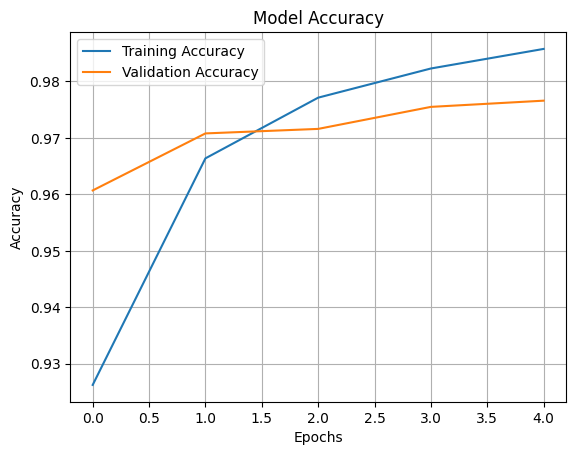

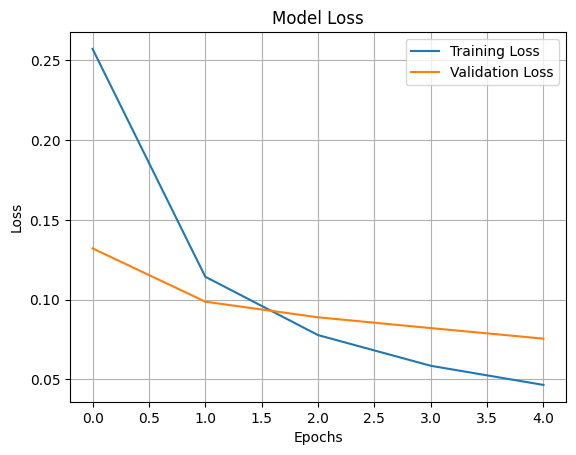

In [3]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# モデルの作成
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # 28x28の画像を1次元に変換
    layers.Dense(128, activation='relu'),   # 隠れ層（128ノード、ReLU活性化関数）
    layers.Dense(10, activation='softmax')  # 出力層（10クラス分類、Softmax）
])

# モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習（学習履歴を保存）
hist = model.fit(train_images, train_labels,
                 epochs=5,
                 validation_data=(test_images, test_labels))  # 学習の実行（validation_data 追加）

# === 学習の可視化 ===
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 損失の推移をプロット
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [10]:
import numpy as np

# 学習後、最初の1つのデータに対して予測
predictions = model(train_images[:3]).numpy()

# ソフトマックスで確率に変換
probabilities = tf.nn.softmax(predictions)

# 確率をNumPy配列に変換
probabilities_np = probabilities.numpy()

# NumPyでの表示設定を変更
np.set_printoptions(precision=3, suppress=True)

# 確率を表示
print(probabilities_np)

print(train_labels[:3])

[[0.086 0.086 0.086 0.087 0.086 0.229 0.086 0.086 0.086 0.086]
 [0.232 0.085 0.085 0.085 0.085 0.085 0.085 0.085 0.085 0.085]
 [0.085 0.085 0.085 0.085 0.23  0.085 0.085 0.086 0.085 0.086]]
[5 0 4]


In [ ]:
import numpy as np

# 学習後、最初の1つのデータに対して予測
predictions = model(test_images[:3]).numpy()

# ソフトマックスで確率に変換
probabilities = tf.nn.softmax(predictions)

# 確率をNumPy配列に変換
probabilities_np = probabilities.numpy()

# NumPyでの表示設定を変更
np.set_printoptions(precision=3, suppress=True)

# 確率を表示
print(probabilities_np)

print(test_labels[:3])

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0873
Test accuracy: 0.9765999913215637
